## Proyecto Final MCPP

#### Tipos de grafos

##### Grafos dirigidos y no dirigidos

La gran diferencia entre estos dos tipos de grafos es que los dirigidos especifican de que forma debo recorrer un grafo, es decir, existe un nodo inicial y uno final; mientras que en un grafo no dirigido no existe un orden específico en recorrer el grafo. (Ver presentación para mayor claridad).

In [70]:
### Librerías que uso para explicar un poco el funcionamiento de los grafos no dirigidos, implementando una clase
import itertools as it
import collections as co
### Libraría pickle me permite leer archivos en formato pkl
import pickle
###
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
### Librería que usare para crear grafos dirigidos
import networkx as nx
### Mapas en python
import folium 
import webbrowser
### Random
from random import randint as rd

La idea es crear dos clases, la primera yo defino un grafo no dirigido de las distintas estaciones del transmilenio, a su vez en esta clase podre crear los diferentes caminos que puedo tener para llegar de una estación a otra.

Para ello requiero definir diferentes conceptos:
#### Vecinos de un nodo
Son todos los nodos que estan conectados con un nodo específico.
#### Vecindades
Es un diccionario que consta de todos los nodos con sus respectivos vecinos.

##### Específicaciones dentro de la clase: estaciones_transmilenio_no_dirigido

- Los lados o conexiones estan dados por una lista: ["a","b"] en este caso los elementos son nodos, como aquí no importa el orden ["a","b"] es igual a ["b","a"].
- Los nodos los definiré con numeros.

In [5]:
### La clase no dirigido, me permite crear un grafo no dirigdo
class estaciones_transmilenio_no_dirigido:
    '''
    Creo un constructor: Para realizar el grafo este consta de las estaciones de transmilenio que 
    representan los nodos del grafo y los lados que son las conexiones que hay entre las diferentes 
    estaciones
    ''' 
    def __init__(self, nodos, lados):
        self.estaciones=nodos
        self.conexiones=lados
        # Agrego un nuevo atributo que será un diccionario de las vencidades 
        self.vecindades={}
    # Funcion que aplicamos en anteriores proyectos para crear vecindades
    def crearvecindades(self):
        if self.vecindades=={}: 
            # Recorro todas las conexiones posibles en las diferentes estaciones de transmilenio
            for j in self.conexiones:
                # Pregunto si el nodo en la posición 0 esta ya creado en las vecindades
                if j[0] in self.vecindades:
                    a=self.vecindades[j[0]]+(j[1],)
                    del self.vecindades[j[0]]
                    self.vecindades[j[0]]=a
                else:
                    self.vecindades[j[0]]=(j[1],)
                if j[1] in self.vecindades:
                    a=self.vecindades[j[1]]+(j[0],)
                    del self.vecindades[j[1]]
                    self.vecindades[j[1]]=a
                else:
                    self.vecindades[j[1]]=(j[0],)

Aca muestro el funcionamiento de la clase: Creo un grafo con 5 nodos y a su vez la union que hay entre los diferentes nodos.

In [6]:
a=estaciones_transmilenio_no_dirigido([1,2,3,4,5],[(1,2),(3,4),(4,5),(3,1)])
a.crearvecindades()
print(a.vecindades)


{2: (1,), 4: (3, 5), 5: (4,), 3: (4, 1), 1: (2, 3)}


Muestro el diccionario de como se generan las vecindades

### Creaciones de grafos dirigidos


Para poder crear un grafo dirigido usare la libreria "networkx"

Otras características que requieren este tipo de grafos para aplicar el algoritmo son las siguientes:

- Capacidad: Para explicar este concepto daré un ejemplo: Imaginemos una tubería, esta tiene un máximo de capacidad para que fluya el agua. Para el caso de transmilenio, para que la gente se transporte de una estación a otra el transmilenio cuenta con una capacidad máxima de personas en el trasnporte
- Flujo: Es la cantidad de personas que se encuentran actualmente dentro el transporte

Un apunte redundante es que es necesario tener en cuenta que el flujo no puede ser nunca mayor a la capacidad.

En los lados de un grafo se identifica a un nodo como cabeza o como cola, depende de la dirección del lado.

In [7]:
'''
Ejemplo de la creación de un grafo dirigido
'''
## Objeto grafo vacío
grafo = nx.DiGraph()
## Agregamos nodos al grafo
grafo.add_nodes_from('ABCDE')
## Agregamos los lados, asimismo con la capacidad correspondiente a cada lado y con un flujo igual a cero
grafo.add_edges_from([
    ('A', 'B', {'capacity': 4, 'flow': 0}),
    ('A', 'C', {'capacity': 5, 'flow': 0}),
    ('A', 'D', {'capacity': 7, 'flow': 0}),
    ('B', 'E', {'capacity': 7, 'flow': 0}),
    ('B', 'C', {'capacity': 7, 'flow': 0}),
    ('C', 'D', {'capacity': 6, 'flow': 0}),
    ('D', 'E', {'capacity': 8, 'flow': 0}),
])

Crearé una función que me permite graficar los grafos.

In [8]:
'''
El parametro grafo es el objeto grafo, mientras que el layout es un diccionario donde indico en que posicion me gustaría
mostrar los nodos.
'''
def grafico_grafo(grafo,layout):
    plt.figure(figsize=(20, 4))
    plt.axis('off')
    
    # Selecciono los nodos del grafo, los pintaré de color azul
    nx.draw_networkx_nodes(grafo, layout, node_color='steelblue', node_size=600)
    # Selecciono los lados del grafo, los pintaré de color gris
    nx.draw_networkx_edges(grafo, layout, edge_color='gray')
    # labels para los nodos
    nx.draw_networkx_labels(grafo, layout, font_color='white')
    
    # Con este 'for' indicare donde graficas los nodos y hare los labels del flujo y la capacidad
    for i, j, e in grafo.edges(data=True):
        # Formato en que estará el flujo y la capacidad
        label = '{}/{}'.format(e['flow'], e['capacity'])
        # Color del laber se pintará de color verde si el flujo es menor a la capacidad y rojo en otro caso
        color = 'green' if e['flow'] < e['capacity'] else 'red'
        x = layout[i][0] * .6 + layout[j][0] * .4
        y = layout[i][1] * .6 + layout[j][1] * .4
        t = plt.text(x, y, label, size=16, color=color, 
                     horizontalalignment='center', verticalalignment='center')
        
    plt.show()

In [9]:
# Layout del ejemplo realizado
layout = {
    'A': [0, 1], 'B': [1, 2], 'C': [1, 1], 'D': [1, 0],
    'E': [3, 1]
}

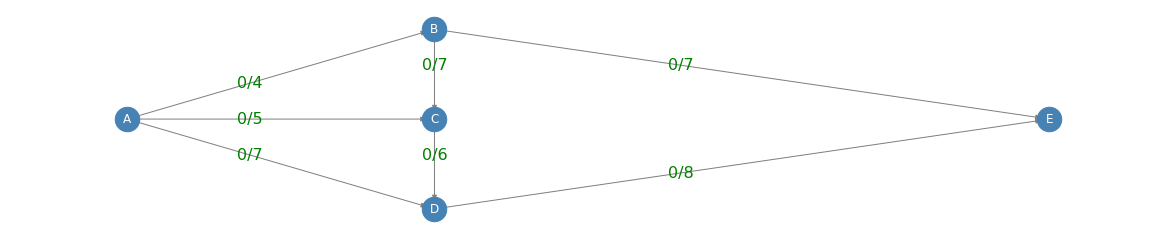

In [10]:
grafico_grafo(grafo,layout)

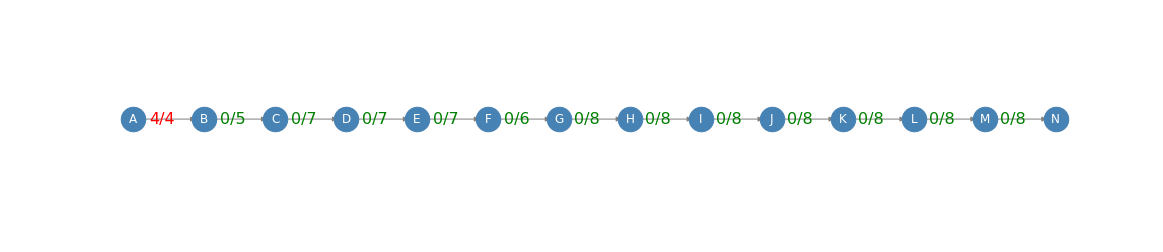

In [11]:
# Ejemplo de como se verían las estaciones de transmilenio de la 26 # Con ruta facil
'''
Portal dorado=A
Modelia=B
Normandia=C
AvRojas=D
Tiempo=E
Salitre=F
CAN=G
Gobernacion=H
QuintaParedes=I
Corferias=J
CiuUniver=K
ConcejoBogota=L
CentroMemoria=M
Universidades=N
'''
## Objeto grafo vacío
est26 = nx.DiGraph()
## Agregamos nodos al grafo
est26.add_nodes_from('ABCDEFGHIJKLMN')
## Agregamos los lados, asimismo con la capacidad correspondiente a cada lado y con un flujo igual a cero
est26.add_edges_from([
    ('A', 'B', {'capacity': 4, 'flow': 4}),
    ('B', 'C', {'capacity': 5, 'flow': 0}),
    ('C', 'D', {'capacity': 7, 'flow': 0}),
    ('D', 'E', {'capacity': 7, 'flow': 0}),
    ('E', 'F', {'capacity': 7, 'flow': 0}),
    ('F', 'G', {'capacity': 6, 'flow': 0}),
    ('G', 'H', {'capacity': 8, 'flow': 0}),
    ('H', 'I', {'capacity': 8, 'flow': 0}),
    ('I', 'J', {'capacity': 8, 'flow': 0}),
    ('J', 'K', {'capacity': 8, 'flow': 0}),
    ('K', 'L', {'capacity': 8, 'flow': 0}),
    ('L', 'M', {'capacity': 8, 'flow': 0}),
    ('M', 'N', {'capacity': 8, 'flow': 0}),
])
## Layout de este grafo
layout_26 = {
    'A': [0, 1], 'B': [1, 1], 'C': [2, 1], 'D': [3, 1],
    'E': [4, 1], 'F': [5, 1], 'G': [6, 1], 'H': [7, 1],
    'I': [8, 1], 'J': [9, 1], 'K': [10, 1], 'L': [11, 1],
    'M': [12, 1], 'N': [13, 1]
}
grafico_grafo(est26,layout_26)

### Algoritmo Ford-Fulkerson

Este algoritmo me permite encontrar la forma óptima de que el flujo corra de manera máxima a través de la red. Para empezar hay que tener en cuenta diferentes aspectos para poder aplicar el algoritmo:

- Fuente: Nodo donde inicia el flujo a correr.
- Desague: Nodo final, donde termina el flujo.

Para el caso del transmilenio, una cierta cantidad de personas parten de una estación y buscan llegar a otra. Entonces la intención de este proyecto es: Primero, generar una simulación aleatoria del funcionamiento del algoritmo; Segundo, poder utilizar la encuesta de movilidad para poder ver como se mueve la gente en la ciudad, es decir, de donde parten y para donde van. De esta manera, se crearía una política que optimice los transmilenios en funcionamiento y tambien evidenciar si es necesario tener mas líneas de transporte.

In [17]:
def busqueda_profunda(grafo, fuente, desague):
    # Convierto el grafo a uno no dirigido
    no_dirigido = grafo.to_undirected()
    # Nodos que voy revisando
    # Empiezo con el nodo fuente
    explorados = {fuente}
    #
    stack = [(fuente, 0, dict(no_dirigido[fuente]))]
    #
    print(stack)
    
    while stack:
        v, _, vecinos = stack[-1]
        if v == desague:
            break
        
        # search the next neighbour
        while vecinos:
            u, e = vecinos.popitem()
            if u not in explorados:
                break
        else:
            stack.pop()
            continue
        
        # current flow and capacity
        direccion = grafo.has_edge(v, u)
        capacidad = e['capacity']
        flujo = e['flow']
        vecinos = dict(no_dirigido[u])

        # increase or redirect flow at the edge
        if direccion and flujo < capacidad:
            stack.append((u, capacidad - flujo, vecinos))
            explorados.add(u)
        elif not direccion and flujo:
            stack.append((u, flujo, vecinos))
            explorados.add(u)

    # (source, sink) path and its flow reserve
    reserve = min((f for _, f, _ in stack[1:]), default=0)
    path = [v for v, _, _ in stack]
    
    return path, reserve

def ford_fulkerson(grafo, fuente, desague, debug=None):
    flujo=0
    camino=True
    
    while camino:
        # search for path with flow reserve
        camino, reserva = busqueda_profunda(grafo, fuente, desague)
        flujo += reserva

        # increase flow along the path
        for v, u in zip(camino, camino[1:]):
            if grafo.has_edge(v, u):
                grafo[v][u]['flow'] += reserva
            else:
                grafo[u][v]['flow'] -= reserva
        
        # show intermediate results
        if callable(debug):
            debug(grafo, camino, reserva, flujo)

def flow_debug(graph, path, reserve, flow):
    print('flow increased by', reserve, 
          'at path', path,
          '; current flow', flow)
    grafico_grafo(est26,layout_26)

[('A', 0, {'B': {'capacity': 4, 'flow': 4}})]
flow increased by 0 at path [] ; current flow 0


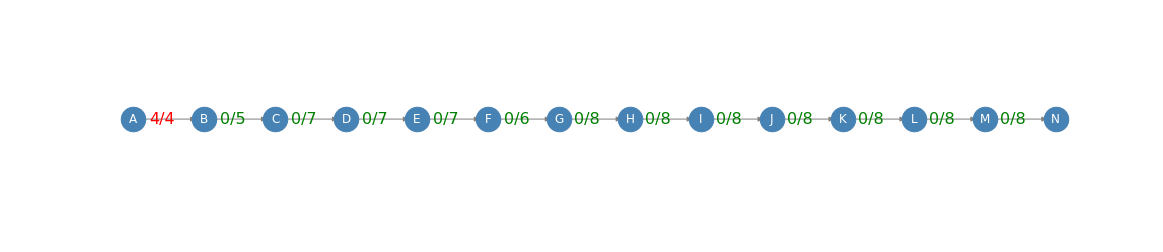

In [16]:
ford_fulkerson(est26, 'A', 'N', flow_debug)

In [14]:

graph = nx.DiGraph()
graph.add_nodes_from('ABCDEFGH')
graph.add_edges_from([
    ('A', 'B', {'capacity': 4, 'flow': 0}),
    ('A', 'C', {'capacity': 5, 'flow': 0}),
    ('A', 'D', {'capacity': 7, 'flow': 0}),
    ('B', 'E', {'capacity': 7, 'flow': 0}),
    ('C', 'E', {'capacity': 6, 'flow': 0}),
    ('C', 'F', {'capacity': 4, 'flow': 0}),
    ('C', 'G', {'capacity': 1, 'flow': 0}),
    ('D', 'F', {'capacity': 8, 'flow': 0}),
    ('D', 'G', {'capacity': 1, 'flow': 0}),
    ('E', 'H', {'capacity': 7, 'flow': 0}),
    ('F', 'H', {'capacity': 6, 'flow': 0}),
    ('G', 'H', {'capacity': 4, 'flow': 0}),
])
layout = {
    'A': [0, 1], 'B': [1, 2], 'C': [1, 1], 'D': [1, 0],
    'E': [2, 2], 'F': [2, 1], 'G': [2, 0], 'H': [3, 1],
}

## Mapa

Usaré la libreria folium para crear el mapa, busco las longitud y latitud de Colombia para poder realizarlo

In [18]:
latitude = 4.6471
longitude = -74.0906
traffic_map = folium.Map(location=[latitude, longitude], zoom_start=11.2)
traffic_map

# Encuesta de movilidad 2015


El propósito de uso de esta encuesta es encontrar a donde y de que sitio se movilizan más los ciudadanos bogotanos

In [21]:
pkl = open('encuesta.pkl', 'rb')
data = pickle.load(pkl)
pkl.close()

In [28]:
# Se revisan las diferentes variables de la tabla
print(data.columns)
# tamaño de la encuesta
print("Tamaño de la encuesta:",len(data))

Index(['ID_ENCUESTA', 'NUMERO_PERSONA', 'NUMERO_VIAJE', 'MOTIVOVIAJE',
       'HORA_INICIO', 'HORA_FIN', 'MEDIO_PREDOMINANTE', 'ZAT_DESTINO',
       'ZAT_ORIGEN', 'DEPARTAMENTO_ORIGEN', 'DEPARTAMENTO_DESTINO',
       'DIFERENCIA_HORAS', 'DIA_HABIL', 'DIA_NOHABIL', 'PICO_HABIL',
       'PICO_NOHABIL', 'VALLE_NOHABIL', 'VALLE_HABIL', 'FE_TOTAL_viajes',
       'FACTOR_AJUSTE_TRANSMILENIO', 'PONDERADOR_CALIBRADO_VIAJES',
       'longitude_o', 'latitude_o', 'longitude_d', 'latitude_d', 'BARRIO',
       'NUMERO_HOGARES', 'NUMERO_PERSONAS', 'ESTRATO', 'DEPARTAMENTO',
       'ZAT_HOGAR', 'PONDERADOR_CALIBRADO_viajes', 'FACTOR_AJUSTE_viajes',
       'FE_TOTAL_encuesta', 'SEXO', 'EDAD', 'PONDERADOR_CALIBRADO_personas',
       'FACTOR_AJUSTE_personas', 'FE_TOTAL'],
      dtype='object')
Tamaño de la encuesta: 144950


Las variables que me permiten ver a donde va la gente y de donde vienen son: ZAT_DESTINO Y ZAT ORIGEN

In [44]:
origen=data["ZAT_ORIGEN"]
destino=data["ZAT_DESTINO"]
parejas=[]
# Voy a crear parejas de datos es decir hacia donde van y y hacia donde se dirigen
for i in range(0,len(data)):
    par=str(origen[i])+'-'+str(destino[i])
    parejas.append(par)
print(parejas)

['566-238', '238-566', '566-564', '564-566', '227-138', '138-227', '227-239', '239-227', '546-385', '385-546', '546-385', '385-546', '546-548', '548-546', '570-534', '534-570', '570-842', '842-570', '570-850', '850-570', '533-288', '288-533', '533-590', '590-533', '411-308', '308-411', '411-40', '40-411', '522-596', '596-522', '522-27', '27-522', '413-290', '290-413', '413-275', '275-413', '413-291', '291-413', '413-413', '413-413', '193-340', '340-193', '565-993', '993-565', '522-523', '523-522', '522-523', '523-522', '522-523', '523-522', '417-418', '418-417', '522-410', '410-522', '522-522', '522-522', '522-417', '417-522', '417-255', '255-417', '417-849', '849-417', '522-130', '130-522', '522-241', '241-522', '522-241', '241-522', '522-849', '849-522', '522-849', '849-522', '522-418', '418-522', '522-849', '849-522', '411-900', '900-411', '411-557', '557-411', '412-396', '396-412', '417-87', '87-417', '527-275', '275-527', '527-275', '275-527', '412-552', '552-412', '554-951', '951

In [52]:
'''
Ahora realizaré un conteo de la anterior lista, crearé un diccionario para ello
'''
viajes={}
for i in parejas:
    # Pregunto si la pareja esta en el diccionario
    if i in viajes:
        # Sumo uno a la cantidad actual
        viajes[i]=viajes[i]+1
    # sino la creo
    else:
        viajes[i]=1
print(viajes)

{'566-238': 1, '238-566': 1, '566-564': 5, '564-566': 5, '227-138': 1, '138-227': 1, '227-239': 1, '239-227': 1, '546-385': 2, '385-546': 2, '546-548': 1, '548-546': 1, '570-534': 1, '534-570': 1, '570-842': 1, '842-570': 1, '570-850': 1, '850-570': 1, '533-288': 1, '288-533': 1, '533-590': 1, '590-533': 1, '411-308': 1, '308-411': 1, '411-40': 1, '40-411': 1, '522-596': 1, '596-522': 1, '522-27': 1, '27-522': 1, '413-290': 1, '290-413': 1, '413-275': 2, '275-413': 1, '413-291': 1, '291-413': 1, '413-413': 26, '193-340': 1, '340-193': 1, '565-993': 1, '993-565': 1, '522-523': 8, '523-522': 8, '417-418': 1, '418-417': 1, '522-410': 5, '410-522': 4, '522-522': 10, '522-417': 3, '417-522': 4, '417-255': 1, '255-417': 1, '417-849': 1, '849-417': 1, '522-130': 1, '130-522': 1, '522-241': 2, '241-522': 2, '522-849': 3, '849-522': 3, '522-418': 6, '418-522': 7, '411-900': 2, '900-411': 2, '411-557': 7, '557-411': 7, '412-396': 2, '396-412': 2, '417-87': 1, '87-417': 1, '527-275': 2, '275-527'

Creare un grafo en que sitios se transforman las personas

In [63]:
transporte=nx.DiGraph()
# Recorro el diccionario
for i in viajes:
    # Creo listas temporales donde separo el origen del destino
    temp_list=i.split('-')
    transporte.add_edge(temp_list[0],temp_list[1],weight=viajes[i])

In [75]:
# Grafiquemos el grafo
layout_transporte={}
for i in transporte.nodes:
    layout_transporte[i]=[rd(0,10),rd(0,10)]
#grafico_grafo(transporte,layout_transporte)

566-238
238-566
566-564
564-566
227-138
138-227
227-239
239-227
546-385
385-546
546-548
548-546
570-534
534-570
570-842
842-570
570-850
850-570
533-288
288-533
533-590
590-533
411-308
308-411
411-40
40-411
522-596
596-522
522-27
27-522
413-290
290-413
413-275
275-413
413-291
291-413
413-413
193-340
340-193
565-993
993-565
522-523
523-522
417-418
418-417
522-410
410-522
522-522
522-417
417-522
417-255
255-417
417-849
849-417
522-130
130-522
522-241
241-522
522-849
849-522
522-418
418-522
411-900
900-411
411-557
557-411
412-396
396-412
417-87
87-417
527-275
275-527
412-552
552-412
554-951
951-554
544-163
163-544
544-528
528-544
544-993
993-544
420-170
170-420
420-459
459-420
420-454
454-420
532-446
446-532
532-288
288-532
532-932
932-322
322-532
532-276
276-532
554-588
588-554
554-454
454-554
554-702
702-554
522-542
542-522
418-393
393-418
417-442
442-418
418-390
390-418
418-269
269-418
417-120
120-418
554-207
207-554
554-410
410-554
554-386
386-554
563-289
289-554
517-423
423-554
517-28

447-702
702-572
572-702
702-41
41-702
702-416
416-702
702-252
252-702
755-217
217-755
548-342
342-548
548-509
509-548
305-192
192-305
305-304
304-305
305-475
475-305
305-313
313-305
305-325
325-305
305-305
954-401
401-954
954-245
245-954
954-995
995-954
306-314
314-306
306-336
336-306
306-144
144-306
565-411
411-550
550-416
416-550
550-318
318-550
550-411
565-291
291-565
565-424
424-565
736-576
576-736
736-247
247-736
686-286
286-686
686-272
272-686
434-352
352-434
434-291
291-434
434-440
440-434
434-434
434-459
459-434
435-122
122-435
435-501
501-435
435-465
465-435
434-519
519-434
434-239
239-434
431-847
847-434
434-88
88-434
432-371
371-432
432-144
144-432
432-336
336-432
349-88
88-349
40-505
505-40
40-38
38-40
40-33
33-40
32-840
840-32
40-40
40-370
370-40
40-77
77-40
562-634
634-562
562-511
511-562
562-565
565-562
562-276
276-562
562-361
361-562
369-562
562-218
218-562
562-570
570-562
736-443
443-736
736-848
848-736
755-462
462-755
755-754
754-755
755-939
939-755
562-507
507-562
56

37-36
36-37
503-503
503-620
620-503
503-276
276-503
503-415
415-503
503-352
352-503
589-612
612-589
589-501
501-589
589-141
141-589
589-336
336-589
981-294
294-981
981-295
295-981
390-26
26-390
565-475
475-565
657-588
588-657
657-616
616-657
657-502
502-657
657-367
367-657
359-301
301-359
359-441
441-359
357-359
359-357
357-553
553-357
966-363
363-966
358-56
56-358
358-362
362-358
358-401
401-358
358-255
255-358
358-281
281-358
358-336
336-358
358-358
546-533
533-546
945-281
281-945
435-354
354-435
435-336
336-435
434-138
138-434
446-362
362-446
446-443
443-446
446-432
432-446
446-380
380-446
446-346
346-446
440-185
185-440
440-502
502-440
440-440
444-444
444-328
328-444
444-364
364-444
444-339
339-444
445-444
444-445
446-38
38-446
435-517
517-435
435-588
588-435
434-363
363-434
434-247
247-434
434-69
446-177
177-446
446-473
473-446
446-289
289-446
440-550
550-440
440-442
442-440
440-20
20-440
117-115
115-117
532-523
523-532
532-551
551-532
363-341
341-363
363-72
72-363
359-572
572-359

516-529
529-413
413-529
529-419
419-529
529-529
529-454
454-529
67-459
459-67
564-522
522-564
564-203
203-564
564-557
557-564
564-198
198-564
564-279
279-564
564-73
73-73
73-564
544-75
75-544
317-850
850-317
317-401
401-317
317-851
851-317
317-145
145-317
569-63
63-569
36-847
847-36
36-18
18-36
36-244
244-36
36-28
28-36
36-228
228-36
564-202
202-564
945-255
255-945
945-622
622-945
115-46
46-115
115-907
907-115
115-135
135-115
115-103
103-115
115-97
97-115
115-144
144-115
115-69
69-115
91-849
849-91
91-89
89-91
91-67
67-91
91-93
93-91
110-322
322-110
110-202
202-110
110-167
167-110
110-291
291-110
477-110
110-255
255-110
110-95
95-110
118-336
336-118
118-28
28-118
118-105
105-118
118-115
115-118
94-89
89-94
94-364
364-94
94-842
842-94
93-93
44-93
94-41
41-94
94-134
134-94
94-234
234-94
839-94
94-224
224-94
411-397
397-411
415-558
558-415
415-557
557-415
411-256
256-411
411-416
416-411
411-447
447-411
115-901
901-115
115-187
187-115
118-902
902-118
94-36
36-94
134-134
94-454
454-94
94-47

447-619
619-280
280-619
619-501
501-619
735-740
740-735
735-453
453-502
502-735
744-736
736-744
425-310
310-425
425-476
476-425
436-431
431-436
436-293
293-436
436-363
363-436
436-336
336-436
433-280
280-433
276-433
433-452
452-433
441-779
779-441
118-900
900-118
585-579
585-440
440-585
585-983
983-585
290-355
355-290
290-842
842-290
290-275
275-290
542-294
294-542
542-120
120-542
542-124
124-542
941-848
848-941
941-575
575-941
543-633
633-543
543-302
302-543
543-706
706-543
560-558
558-560
556-393
393-556
556-252
252-556
279-279
279-556
556-259
259-556
556-378
378-391
391-352
352-287
556-335
335-279
556-275
275-556
556-552
552-556
553-847
847-553
550-327
327-550
625-417
417-550
550-620
620-550
548-548
548-466
466-548
548-519
519-548
548-530
530-548
548-138
138-277
533-378
378-533
533-580
580-533
533-69
69-533
533-514
514-533
526-562
562-526
526-255
255-526
526-526
517-190
190-517
517-617
617-517
517-615
615-517
517-427
427-517
517-394
394-517
517-517
423-517
394-323
323-394
394-300
30

371-993
563-613
613-563
563-470
470-563
563-240
240-563
563-731
731-563
561-341
341-561
561-183
183-561
563-501
501-563
540-276
276-540
517-345
345-517
517-145
145-517
516-383
383-516
516-575
575-516
517-457
457-517
517-153
153-517
517-355
355-517
964-368
368-964
560-120
120-560
560-580
580-560
560-456
456-560
67-351
351-67
67-294
294-67
103-101
101-103
103-27
27-103
103-354
108-103
103-169
169-103
103-244
244-103
103-177
177-103
48-88
88-27
27-48
67-588
588-67
959-959
103-53
53-103
103-906
906-103
103-836
836-836
836-103
103-18
18-103
33-163
163-33
33-409
409-33
33-87
87-33
488-473
473-488
103-26
26-103
103-457
457-103
33-689
689-33
33-86
86-33
33-137
137-33
33-302
302-33
33-89
89-33
446-341
341-446
446-639
639-446
107-841
841-107
107-96
96-107
107-103
103-107
67-155
67-140
140-67
104-422
422-104
104-104
761-41
41-761
535-58
58-535
535-57
57-535
535-542
542-535
535-254
254-535
535-528
528-535
535-529
529-535
535-410
410-535
540-661
661-540
540-575
575-540
341-341
341-540
540-520
520-5

779-520
519-314
314-519
519-444
444-519
519-421
421-519
519-524
524-519
519-519
520-27
27-520
520-187
187-520
520-903
903-520
520-88
88-520
520-420
420-520
520-513
513-520
520-254
254-520
520-277
277-520
520-87
87-520
520-850
850-520
539-277
277-539
539-850
850-539
539-180
180-539
526-393
393-526
526-901
901-526
964-235
235-964
964-419
419-964
964-418
418-964
964-533
533-964
964-383
383-964
964-951
964-94
94-964
964-168
168-964
945-460
460-945
945-428
428-945
945-147
147-945
945-363
363-945
945-843
843-945
650-641
641-650
117-364
364-117
117-293
293-117
117-298
298-117
117-89
89-117
40-279
279-40
40-7
7-40
529-766
766-529
529-631
631-529
522-432
432-522
270-687
687-270
270-363
363-270
270-396
396-270
526-527
527-526
526-536
536-526
678-679
679-678
678-639
639-678
321-271
271-321
321-402
402-321
321-951
951-321
319-325
325-319
657-681
657-27
27-588
657-676
676-657
657-291
291-387
387-657
632-987
987-632
632-391
391-632
632-685
685-632
632-239
239-632
632-280
280-632
632-851
851-632
632-

560-588
588-560
523-623
623-523
523-692
692-523
435-435
847-431
431-87
87-431
138-345
345-138
138-145
145-138
138-352
352-138
138-849
849-138
138-276
276-138
138-326
326-138
138-351
351-138
138-138
954-908
908-954
320-125
125-320
320-69
69-320
320-295
295-322
322-320
320-322
314-315
315-314
314-96
96-314
305-364
364-305
314-476
476-314
998-301
301-998
998-294
294-998
998-906
906-998
998-298
298-998
998-322
322-998
998-335
335-330
330-734
998-236
236-998
998-363
363-998
550-303
303-550
529-328
429-305
305-429
429-276
276-429
429-299
299-429
429-428
428-429
429-959
959-429
429-167
167-429
429-180
180-429
429-377
377-429
429-144
144-429
301-621
621-429
430-367
367-429
447-187
187-363
438-447
447-996
996-447
446-477
477-446
435-341
341-344
344-435
436-288
288-435
435-433
433-435
430-847
847-430
430-432
432-430
431-393
393-431
434-431
654-143
143-654
654-154
154-654
654-656
656-654
569-336
336-569
569-371
371-569
569-549
549-569
569-408
408-569
623-568
568-623
623-446
569-450
450-623
623-36

290-617
617-306
306-617
617-355
355-617
617-311
311-617
617-526
526-617
617-982
982-617
617-52
52-617
617-459
459-617
575-313
313-575
575-504
504-575
575-455
455-575
627-28
28-627
662-633
633-662
662-629
629-662
662-532
532-662
662-203
203-662
662-634
634-662
661-69
69-661
661-240
240-661
662-661
661-662
662-779
779-662
662-613
613-662
662-664
664-662
662-662
662-457
457-662
662-540
540-662
625-423
423-625
649-364
649-595
595-649
649-848
848-344
344-649
649-102
102-649
535-409
409-535
575-354
354-355
355-575
593-297
297-593
593-976
976-593
963-625
625-963
982-267
267-982
587-294
294-587
983-330
330-983
983-452
452-983
983-983
616-410
410-616
616-447
447-616
983-507
507-983
983-501
501-983
983-339
339-983
983-525
525-983
983-352
352-983
593-456
456-906
906-593
462-593
598-261
261-598
598-92
92-598
598-352
352-598
547-621
621-547
547-436
436-547
575-623
623-575
963-455
455-963
461-473
473-461
461-450
450-461
593-639
639-593
593-415
415-593
982-575
575-982
593-982
616-177
177-616
616-963


552-597
597-473
473-597
598-971
971-598
598-146
146-598
598-459
459-598
598-536
536-598
664-942
942-664
664-851
851-664
664-944
944-664
664-443
443-664
664-513
513-664
662-755
755-662
662-576
576-662
517-702
702-517
517-511
511-517
664-473
473-664
664-287
287-664
176-131
131-176
176-120
120-176
176-786
786-176
131-299
299-131
180-297
297-180
180-214
214-180
179-26
26-179
180-119
119-180
180-294
294-180
527-990
990-527
527-571
571-527
527-524
527-943
943-527
527-950
950-527
527-528
528-527
527-533
533-527
12-150
150-12
12-457
457-12
59-57
57-59
59-235
235-59
21-325
325-21
21-59
59-21
59-144
144-59
149-88
88-149
77-87
87-77
77-477
477-77
77-151
151-77
457-77
60-475
475-60
60-28
28-60
60-992
992-60
60-457
457-60
60-276
276-60
60-49
49-60
60-291
291-60
60-294
294-60
77-88
88-77
77-944
944-77
77-86
86-77
60-999
999-60
60-902
902-60
60-594
594-60
626-625
625-626
626-507
507-626
626-364
364-626
52-69
69-52
52-288
288-52
57-52
939-961
961-939
939-588
588-939
176-472
472-176
54-317
317-54
54-14

218-212
212-218
529-950
950-529
290-951
290-276
276-290
290-322
322-290
447-430
430-447
413-386
386-413
547-548
548-553
553-548
533-528
528-533
533-523
523-533
533-26
26-533
466-179
179-463
463-120
120-463
463-914
914-463
466-453
453-466
466-950
950-466
466-468
468-466
447-220
220-447
447-9
9-447
447-447
447-521
521-447
650-473
650-972
972-650
298-453
453-298
641-200
200-650
650-458
458-650
282-228
228-282
282-453
453-282
282-257
257-282
173-532
532-173
173-838
838-173
173-361
361-173
173-543
543-173
173-417
417-173
218-907
907-218
218-83
83-218
218-849
849-218
218-167
167-192
192-298
298-218
218-342
342-218
292-71
71-292
292-851
851-292
292-960
960-292
389-139
139-389
525-313
313-525
525-533
533-525
525-278
278-525
733-539
539-733
733-305
305-733
292-853
853-292
292-300
300-180
180-292
909-909
28-905
905-28
46-230
230-46
46-45
45-46
28-87
87-28
335-900
900-335
336-41
41-336
709-517
517-709
708-517
394-251
251-394
394-313
313-394
394-358
358-394
415-415
415-989
989-415
549-266
266-549


66-64
566-501
501-566
566-565
565-566
176-293
293-176
176-124
124-176
176-176
703-763
763-703
703-632
469-502
502-469
717-661
661-717
717-985
985-717
717-678
678-717
717-672
672-717
717-662
662-717
717-9
9-717
717-457
457-717
717-364
273-717
717-580
580-717
672-228
228-501
501-672
672-447
447-672
672-69
69-672
672-96
96-672
672-279
279-672
176-462
462-176
176-218
218-176
179-179
179-209
209-176
431-538
519-538
276-538
61-255
255-61
61-167
167-61
390-437
437-390
179-945
945-179
91-44
44-91
91-458
458-91
91-997
997-91
91-163
163-91
140-355
355-140
140-301
301-140
140-354
354-140
140-168
168-140
140-456
456-140
140-140
140-292
292-140
733-405
405-733
733-248
248-733
733-304
304-733
538-247
247-538
740-745
745-740
740-743
743-740
735-276
276-735
735-734
734-735
666-336
336-666
666-140
140-666
666-574
574-666
666-625
625-666
736-687
687-736
716-404
404-716
716-720
720-716
52-79
79-52
52-74
74-52
52-385
385-52
52-350
350-52
52-364
364-52
52-155
155-52
52-244
244-52
53-355
355-53
53-456
456-5

135-396
540-275
275-540
540-255
255-540
540-461
461-540
571-522
522-571
571-120
120-665
665-282
282-665
665-836
836-665
543-47
47-543
543-168
168-543
449-134
134-449
449-992
992-449
540-454
454-540
618-345
345-618
618-288
288-618
618-369
369-618
618-86
86-618
543-409
409-543
543-367
367-543
540-248
248-540
650-951
951-650
650-387
387-650
650-732
732-650
643-322
322-643
650-455
455-650
608-255
255-608
608-339
339-608
608-362
362-608
608-477
477-608
608-320
320-608
608-429
429-302
302-608
608-336
336-608
543-456
456-543
543-146
146-543
543-458
458-543
546-365
365-546
546-776
776-546
543-519
519-543
543-314
314-543
543-305
305-543
41-171
171-41
41-912
912-41
12-181
181-12
6-147
147-6
6-421
421-6
11-69
69-11
11-59
59-11
27-169
169-27
11-301
301-11
11-996
996-227
227-9
11-145
145-145
149-133
133-149
149-148
148-149
149-87
87-149
59-82
82-59
59-63
63-59
59-222
222-59
370-444
444-370
72-67
67-72
77-243
243-77
77-26
26-77
543-540
540-543
543-355
355-543
547-394
394-547
547-365
365-547
543-418


511-327
513-144
144-513
516-540
540-516
851-154
154-851
851-229
229-851
851-148
148-851
851-333
333-851
851-138
138-851
851-288
288-851
851-313
313-851
11-475
475-11
11-909
909-11
11-89
89-163
69-363
363-69
69-349
349-69
69-449
449-69
69-423
423-69
69-163
163-69
69-77
77-69
69-900
900-69
69-250
250-69
69-782
782-69
69-87
87-69
69-88
88-69
69-27
27-69
69-779
779-69
69-346
346-69
69-63
63-69
68-254
254-68
68-88
88-68
68-289
289-68
68-234
234-68
68-912
912-68
68-340
340-68
49-63
63-913
913-49
17-22
22-17
92-7
7-92
92-395
395-92
95-847
847-95
95-255
255-340
95-152
152-258
99-142
142-99
99-66
66-99
99-477
477-99
99-147
147-99
99-993
993-99
99-476
476-155
49-54
54-70
70-49
47-88
88-47
47-851
851-47
47-960
960-47
68-345
345-68
68-354
354-68
68-290
290-68
68-57
57-68
68-452
452-68
68-352
352-68
68-52
52-68
68-69
69-68
272-501
501-272
621-517
517-381
381-621
621-197
197-621
841-512
512-841
841-618
618-841
841-547
547-841
275-355
355-473
473-11
11-473
675-628
628-675
510-280
280-510
510-146
146-

183-269
269-183
183-290
290-183
725-575
575-725
725-962
962-725
724-592
592-724
724-980
980-724
727-26
26-727
727-987
987-727
727-286
286-727
727-727
724-300
300-724
724-621
621-724
710-363
363-710
717-454
454-717
717-707
707-717
717-618
618-717
710-26
26-710
709-714
714-709
709-87
87-709
709-635
635-709
709-364
364-709
524-26
26-524
625-524
625-621
621-524
625-849
849-625
625-429
429-625
625-281
281-625
625-184
184-625
498-360
360-498
499-443
443-499
465-265
265-465
498-507
507-498
498-180
180-498
498-447
447-498
498-502
502-498
498-506
506-498
436-221
221-501
25-452
452-25
851-852
852-851
851-276
276-851
147-176
176-147
147-444
444-147
836-222
222-147
147-87
87-147
147-473
473-147
11-341
341-11
11-455
455-11
11-26
26-11
11-459
459-11
17-223
223-17
17-214
214-17
17-259
259-17
17-354
354-17
17-332
332-17
282-151
151-282
282-281
281-282
292-335
292-231
231-292
292-294
294-292
282-579
579-282
282-433
433-282
282-299
299-282
292-180
292-353
353-292
292-241
241-292
292-11
11-292
292-843
84

124-178
178-124
124-124
124-228
228-124
625-304
304-625
520-625
454-386
386-234
234-456
386-354
354-386
386-442
442-386
386-275
275-386
386-362
362-386
386-289
289-386
464-25
25-464
464-50
50-464
451-144
144-451
450-511
511-450
450-592
592-450
450-443
443-450
521-416
379-344
344-379
509-271
271-459
515-292
292-515
515-295
295-515
515-950
950-515
515-514
514-515
513-269
269-513
513-274
274-513
176-847
847-176
295-275
275-295
295-258
258-295
295-289
289-295
295-288
288-295
295-438
438-295
298-363
363-298
298-253
253-253
253-298
427-453
453-427
427-774
774-427
515-515
515-245
245-515
427-502
502-427
427-355
355-427
467-286
286-467
467-453
453-467
467-274
274-467
467-993
993-467
467-951
951-467
467-267
267-467
467-468
468-467
467-143
143-467
467-502
502-467
467-144
144-467
188-189
189-188
188-135
135-188
188-907
907-188
188-289
289-188
188-354
354-188
192-385
385-192
192-251
251-192
181-271
271-181
181-112
112-181
181-259
259-181
181-839
839-181
181-443
443-181
181-403
403-181
182-187
187-

416-533
535-238
238-535
535-258
258-535
535-441
441-535
708-618
618-708
708-544
544-708
708-661
661-708
708-708
708-996
996-708
708-851
851-708
708-400
400-708
708-987
987-708
708-363
363-708
517-708
708-843
843-575
513-502
502-708
629-317
850-172
172-519
519-629
629-842
842-516
516-629
629-516
629-795
795-965
965-516
629-482
482-629
629-144
144-629
447-513
513-447
473-447
447-474
474-447
447-519
519-447
447-256
256-447
447-279
279-447
447-607
607-447
292-254
254-292
213-214
214-213
209-214
214-209
209-216
216-209
209-198
198-209
206-127
127-206
206-294
294-206
170-459
459-170
172-137
137-172
172-138
138-172
229-218
218-226
226-229
229-339
339-229
227-188
188-227
228-242
242-228
407-166
166-407
407-144
144-407
38-165
165-38
38-311
311-38
38-167
167-38
38-27
27-38
136-222
222-136
136-131
131-136
229-230
230-229
229-81
81-229
229-169
169-229
229-442
442-229
229-275
275-229
228-144
144-228
228-168
168-228
228-850
850-228
228-165
165-228
228-227
227-228
228-279
279-228
309-345
345-109
109-

452-281
279-47
47-852
852-279
57-279
339-779
779-339
340-53
53-340
12-49
49-12
12-7
7-12
11-960
960-11
76-475
475-82
82-82
324-327
327-272
272-327
327-163
163-327
596-425
425-596
596-361
361-596
596-505
505-596
596-900
900-596
549-27
27-549
549-531
531-549
371-363
363-371
428-428
428-281
281-428
428-427
427-428
427-427
427-381
381-427
370-377
377-370
370-456
456-370
66-56
56-66
348-431
431-348
348-57
57-348
275-288
286-431
431-286
286-363
363-286
286-524
524-286
286-275
275-286
286-144
144-286
101-406
406-101
101-126
126-101
100-254
254-100
101-593
593-101
100-505
505-100
101-247
247-100
453-101
133-345
345-133
133-9
9-133
133-146
146-133
133-147
147-133
853-277
277-853
853-348
348-853
853-239
239-853
853-177
177-853
65-279
279-65
65-456
456-65
65-853
853-65
65-82
82-65
65-455
455-65
64-363
363-64
64-854
854-64
65-459
459-65
65-88
88-65
853-345
345-853
853-298
298-853
92-69
69-92
92-323
323-92
92-271
271-92
92-87
87-92
92-356
356-92
92-288
288-92
625-138
625-322
322-625
625-664
664-625

741-752
752-194
194-752
736-915
915-736
355-87
87-355
743-352
352-355
732-451
451-732
732-363
363-732
732-543
543-732
732-341
341-732
453-735
785-782
782-785
785-234
234-785
787-382
382-787
787-787
787-240
240-787
785-779
779-785
785-781
781-785
785-787
787-785
785-901
901-785
487-469
469-487
487-436
436-487
487-433
433-487
487-487
487-255
255-487
487-483
483-487
487-481
481-487
487-365
365-487
487-13
13-487
487-363
363-487
348-276
276-348
348-457
457-348
348-439
439-348
348-433
433-348
348-452
452-348
342-452
457-354
348-40
40-348
348-325
325-348
347-41
41-347
348-324
324-348
516-836
836-516
516-246
246-516
516-276
276-516
516-87
87-516
516-170
170-516
516-507
507-516
516-199
199-516
516-389
389-516
516-499
499-516
768-154
154-768
768-168
168-768
768-453
453-768
768-454
454-768
786-766
766-786
786-777
777-786
786-767
767-786
787-180
180-787
787-544
544-787
787-362
362-787
787-781
781-787
194-295
295-194
194-313
313-194
194-342
194-120
120-194
194-193
193-194
194-197
197-194
194-322
32

991-463
463-507
507-463
463-239
239-463
463-467
467-463
463-505
505-463
490-368
368-490
490-351
351-490
779-348
348-779
279-779
779-279
787-403
403-781
787-255
255-787
516-299
299-516
773-377
377-773
773-255
255-773
773-325
325-773
773-354
354-773
773-423
423-773
773-944
944-773
767-144
144-767
767-454
454-767
767-271
271-767
767-304
304-767
767-588
588-767
779-385
385-779
779-241
241-779
768-421
421-768
629-574
574-629
629-54
54-629
629-946
946-629
776-951
951-776
350-618
618-993
993-350
350-352
352-350
350-353
353-350
350-477
477-350
349-354
354-349
349-991
991-349
766-255
255-766
775-915
775-776
776-775
786-572
572-786
784-777
778-327
327-778
778-541
541-778
778-25
25-501
304-778
778-255
255-778
660-410
951-501
501-660
660-82
82-660
776-82
82-776
787-131
131-787
787-85
85-787
516-326
326-516
775-458
458-775
775-787
775-177
177-775
787-775
786-244
244-786
779-153
153-779
787-532
532-787
787-588
588-787
787-311
311-787
775-784
784-775
779-311
311-775
771-798
798-771
771-767
767-771
77

592-745
745-377
377-745
745-144
144-745
558-787
787-558
787-280
775-532
532-775
775-26
26-775
778-269
269-778
778-416
416-778
778-513
513-778
288-778
778-168
168-778
780-202
202-780
780-777
777-780
782-450
450-782
782-457
457-782
771-775
775-771
785-136
136-785
785-777
216-901
901-216
787-163
163-787
787-656
656-787
459-787
269-456
456-269
269-252
252-269
269-254
254-269
269-354
354-269
269-134
134-269
269-54
54-269
745-774
774-745
626-286
286-626
275-957
957-276
275-133
133-275
275-51
51-275
275-119
119-275
275-136
275-588
588-275
275-209
209-275
279-244
787-542
542-787
788-324
324-788
782-385
385-169
169-326
326-782
788-337
337-788
773-371
371-773
768-462
462-768
787-539
539-778
787-235
235-787
787-209
209-787
574-290
290-574
574-131
131-574
785-120
120-785
220-848
848-220
625-779
779-625
625-574
574-625
209-625
229-237
237-229
229-391
391-229
228-218
218-228
228-689
689-228
228-290
290-848
848-228
228-256
256-228
228-309
309-228
109-209
209-109
109-182
182-109
109-106
106-109
109-46

274-332
332-274
274-145
145-274
274-455
455-274
251-993
993-251
251-52
52-251
251-279
279-251
385-251
621-27
27-621
621-382
382-621
621-256
256-621
717-325
325-717
488-456
456-488
473-458
458-473
473-453
453-473
780-781
781-780
780-324
324-780
788-985
985-788
724-241
241-724
788-532
532-788
625-340
340-625
625-453
453-625
779-297
297-779
779-176
176-779
781-546
546-781
781-256
256-781
473-217
217-473
473-355
461-454
454-461
486-389
389-486
255-473
473-476
476-473
475-473
473-168
168-473
663-164
164-663
101-842
842-101
101-27
27-101
101-993
993-101
101-99
99-101
101-385
385-101
101-404
404-101
101-280
280-101
101-847
847-101
101-505
505-101
165-101
101-181
181-101
101-959
959-101
101-405
405-101
101-97
97-101
107-310
310-107
107-20
20-107
107-280
280-107
107-122
122-107
107-56
56-107
251-288
288-251
251-611
611-251
251-276
276-251
251-226
226-251
724-842
842-724
724-235
235-724
251-183
183-297
297-251
625-94
94-625
595-500
500-595
595-459
459-595
595-434
434-595
595-452
452-595
595-776


451-446
446-451
451-588
588-451
451-355
355-451
452-450
450-452
452-24
24-452
452-357
357-452
452-736
736-452
451-464
464-451
451-447
447-451
451-416
416-451
451-450
450-451
909-951
951-909
901-551
551-901
906-97
97-906
914-238
238-914
914-481
481-914
901-258
258-901
341-901
906-240
255-906
906-239
239-906
906-560
560-906
906-163
163-906
906-853
853-906
906-140
140-71
71-60
60-906
906-259
259-906
906-302
302-906
906-145
145-906
914-51
51-914
914-152
152-57
57-914
914-298
298-914
914-261
261-287
287-914
914-146
146-914
911-342
342-911
911-217
217-911
906-245
245-906
906-96
96-906
909-144
144-909
909-88
88-909
911-353
353-911
901-402
402-901
901-119
119-901
901-848
848-901
901-239
239-901
901-271
271-901
672-27
27-672
906-344
344-906
727-613
613-727
901-363
363-901
901-420
420-901
241-401
901-383
383-901
241-951
951-241
241-286
286-241
235-241
629-167
167-629
629-571
571-629
629-944
944-629
842-629
778-11
11-778
778-458
458-778
778-88
88-778
778-349
349-778
778-625
625-778
778-228
228-77

782-913
913-782
905-908
175-548
548-175
175-174
174-175
175-842
842-175
168-278
278-168
168-231
231-168
168-256
256-168
168-172
172-168
168-224
224-168
168-350
350-168
168-227
227-168
168-143
143-168
224-354
354-224
224-153
153-224
224-51
51-224
224-233
233-224
230-211
211-230
230-509
509-230
230-143
143-230
230-240
240-230
173-178
178-173
838-393
173-146
146-173
173-519
519-173
173-282
282-173
228-339
662-722
722-662
662-454
454-662
285-258
258-96
96-319
319-285
220-282
775-573
573-775
777-945
945-777
901-185
185-901
785-239
239-785
786-336
336-786
786-383
383-786
786-575
575-786
786-271
271-786
901-28
28-901
901-997
997-901
907-341
901-394
394-901
26-458
458-901
901-279
279-901
777-356
356-777
767-407
407-767
767-306
306-767
437-734
734-437
780-778
778-780
901-433
901-766
766-901
901-177
177-901
906-231
231-906
915-224
224-915
915-288
288-341
341-915
915-365
365-915
915-170
170-915
915-215
215-915
915-204
204-915
915-456
456-915
273-263
263-273
273-354
354-273
456-275
255-294
294-275

208-352
352-246
246-208
208-274
274-476
476-208
208-294
294-208
904-959
959-904
900-167
167-900
900-146
146-900
900-361
361-900
900-26
26-900
900-267
267-995
900-264
264-900
399-442
904-195
195-904
910-143
143-910
910-250
250-910
455-904
904-455
455-903
903-455
455-455
910-457
457-910
910-327
327-350
350-327
327-910
910-68
68-910
900-958
958-900
900-257
257-246
246-900
900-326
326-900
900-521
521-900
904-310
310-904
904-146
146-904
904-154
154-904
904-246
246-904
900-371
371-900
900-138
138-900
910-352
352-910
910-280
280-910
910-141
141-910
910-363
363-910
912-847
900-197
197-900
900-256
256-900
167-241
910-125
125-910
910-501
501-910
904-350
350-904
904-457
457-904
904-477
477-904
900-455
455-900
900-309
309-900
900-398
398-900
909-173
173-909
901-520
520-901
901-458
717-285
285-717
717-621
621-717
904-836
836-904
910-286
286-910
708-74
74-708
708-275
275-708
909-288
288-909
910-362
362-455
455-258
258-285
285-910
910-851
851-910
848-907
910-288
288-910
910-134
134-910
900-342
342-90

342-907
907-69
69-907
907-402
402-402
402-907
907-459
459-907
907-320
320-907
913-158
158-209
209-907
158-203
203-907
907-371
371-907
907-501
501-907
910-284
284-910
907-593
593-907
958-79
79-907
910-349
349-910
907-461
907-272
272-907
907-455
455-907
907-168
168-907
907-138
138-907
907-446
446-907
907-259
259-907
251-362
362-907
346-443
443-472
472-459
144-247
907-34
34-907
907-465
465-907
52-907
300-907
907-599
599-907
907-177
177-907
907-675
675-907
907-130
130-907
907-354
354-907
907-244
244-907
702-734
734-702
702-203
203-702
907-350
350-907
907-444
444-907
54-172
172-134
907-243
243-907
341-912
912-474
474-912
907-155
155-907
907-50
50-907
907-443
443-907
907-184
184-907
907-463
463-907
907-413
413-907
218-166
166-218
218-477
477-218
218-275
275-218
218-89
89-218
67-158
158-67
67-443
443-67
67-281
281-67
67-327
327-67
218-345
345-218
218-168
168-218
218-294
294-218
94-67
67-94
94-847
847-94
94-336
336-94
94-333
333-94
66-82
82-355
66-133
133-66
66-218
218-66
65-286
286-292
292-65

574-64
64-574
574-905
905-574
574-779
779-574
574-522
522-574
574-336
336-574
574-459
459-574
574-385
385-574
574-432
432-574
942-900
900-942
942-87
87-942
942-165
165-942
574-177
177-574
574-4
4-574
574-501
501-574
941-51
51-941
563-767
767-336
336-563
563-304
304-563
563-558
558-563
563-367
367-563
222-290
290-222
292-292
290-513
513-290
290-849
849-290
290-40
40-290
290-272
272-290
226-342
342-226
285-228
228-285
298-289
289-298
298-86
86-298
298-87
87-298
453-366
366-327
327-328
328-295
295-328
295-51
51-295
293-138
138-88
88-293
293-134
134-88
340-847
847-340
340-342
342-340
341-340
340-345
345-340
340-226
226-340
340-363
363-340
290-461
461-290
290-53
53-290
290-251
290-61
61-290
290-182
182-290
294-163
163-294
292-326
326-292
292-255
255-292
292-275
282-501
501-282
282-405
405-282
292-297
297-375
375-292
292-281
281-301
107-231
231-355
355-339
339-107
107-458
458-107
754-302
302-754
107-836
107-87
87-107
647-465
465-647
647-181
181-647
647-699
699-647
753-433
433-753
763-364
364

517-385
385-517
517-9
9-517
625-175
175-453
625-536
536-625
625-393
393-625
625-165
165-625
625-342
342-253
253-625
625-544
544-625
625-587
587-625
625-673
673-625
686-456
456-686
686-355
355-686
686-951
951-686
686-328
686-516
516-686
452-686
246-459
459-246
686-247
247-686
686-222
222-686
742-706
706-742
742-276
276-742
742-355
355-742
745-459
459-745
745-372
372-745
685-686
984-363
363-841
841-325
325-984
390-335
335-390
390-152
152-390
390-401
401-390
390-234
234-390
333-153
153-333
333-237
237-333
333-66
66-333
333-709
709-333
523-281
281-523
333-288
327-333
333-522
522-333
523-214
214-523
535-135
135-535
535-259
259-535
523-26
990-407
407-990
990-328
328-990
901-442
442-990
990-996
996-990
337-519
519-337
337-285
285-337
337-280
280-337
337-462
462-337
943-301
301-943
943-363
363-943
943-544
544-943
943-317
317-943
943-384
384-943
943-211
211-943
625-557
557-625
625-212
212-625
984-453
453-984
984-984
984-143
258-299
322-607
607-984
984-507
507-984
952-337
952-286
286-952
952-277

474-158
158-474
487-315
315-487
487-395
395-487
487-492
492-487
477-336
336-477
460-285
285-460
460-74
74-460
474-287
394-474
354-287
287-474
474-395
395-474
474-370
370-474
474-847
849-474
474-217
217-474
847-474
474-247
247-474
492-342
342-492
492-952
952-492
300-231
231-300
300-216
216-300
194-28
28-194
194-911
911-194
842-275
275-842
460-345
345-460
460-67
67-460
460-969
969-460
492-602
602-492
226-776
776-226
295-852
852-295
492-778
778-492
598-148
148-598
598-468
468-598
473-277
277-473
473-499
499-473
477-352
352-477
477-501
501-477
477-166
166-477
477-120
120-477
477-177
177-477
492-348
348-492
492-345
345-492
492-119
119-492
474-588
588-447
474-343
343-474
474-971
971-474
444-345
345-444
444-475
475-444
444-354
354-444
473-410
410-473
482-640
640-482
474-476
476-474
482-313
313-482
482-590
590-482
482-496
496-482
239-305
305-202
195-320
320-195
213-360
360-213
213-350
951-213
312-393
393-312
312-402
194-996
996-194
312-997
997-312
311-242
242-311
311-147
147-311
311-350
350-31

340-201
201-41
41-201
201-842
842-201
290-69
69-290
69-168
535-203
203-535
535-170
170-535
535-302
302-462
462-535
301-299
299-301
338-301
301-355
355-301
301-9
9-247
247-301
301-458
458-301
301-132
132-204
132-301
287-301
736-128
128-736
122-735
194-129
129-735
194-958
958-735
194-354
354-735
194-185
185-236
236-194
194-238
238-194
214-175
842-328
328-842
842-304
842-88
88-842
842-244
244-842
202-328
328-202
202-275
275-202
134-327
327-134
134-322
322-134
134-354
354-134
194-146
146-194
194-454
194-945
945-194
194-381
381-194
187-140
140-187
187-850
850-187
200-201
201-200
200-313
313-200
136-187
187-136
120-254
254-120
119-158
158-119
119-342
342-119
192-304
304-192
192-131
131-192
119-244
244-119
394-143
143-394
394-409
409-394
14-849
849-14
14-27
27-14
349-501
501-349
349-252
252-349
485-850
850-485
485-852
852-485
485-476
476-485
535-219
219-535
524-284
284-524
524-247
247-524
538-511
511-538
538-505
505-538
457-538
413-408
408-413
304-306
304-203
203-304
304-413
413-304
304-379
3

165-389
389-838
838-389
390-344
344-390
107-364
364-355
107-140
140-107
231-107
111-107
107-579
579-107
542-106
106-901
901-106
106-304
304-106
106-302
302-106
106-350
350-106
109-457
457-109
109-951
951-109
109-901
901-109
109-200
200-951
109-9
9-109
302-98
98-302
302-123
123-302
302-336
336-302
302-124
124-302
910-271
271-910
909-254
254-909
909-355
355-909
912-988
988-912
912-452
452-912
908-991
991-908
914-908
908-914
908-454
454-908
908-225
225-908
908-298
298-908
908-69
69-908
909-49
49-909
909-53
53-909
909-8
8-909
543-11
11-543
543-279
279-543
359-183
183-359
359-124
124-359
908-988
988-908
908-143
143-908
908-613
613-908
908-913
913-908
333-222
222-163
163-333
333-370
363-333
333-163
333-367
367-363
333-355
355-163
908-165
165-908
909-119
119-909
909-287
287-909
908-294
294-908
908-354
354-908
908-133
133-908
908-9
9-908
520-299
299-520
520-458
458-520
539-88
88-539
524-423
413-162
162-413
413-254
304-162
162-304
389-169
169-389
389-525
525-389
390-134
134-390
181-7
7-181
122-

289-984
473-143
143-473
473-592
592-473
434-26
26-434
434-371
371-434
434-996
996-434
357-454
454-357
357-362
362-357
359-362
362-359
359-444
444-359
252-273
984-305
305-984
906-385
385-906
233-235
235-233
233-242
242-233
233-229
229-233
233-290
290-233
233-181
181-233
225-143
143-9
9-225
233-325
325-233
233-342
342-233
233-223
223-233
233-902
902-233
233-263
263-233
233-289
289-233
486-258
258-486
501-486
486-473
473-486
912-902
902-289
289-902
473-501
501-473
473-472
472-473
473-455
455-473
167-63
63-167
167-345
345-167
171-170
171-455
455-171
171-254
254-171
906-73
73-906
902-276
276-902
902-315
315-166
902-87
87-902
902-424
424-902
902-184
184-902
233-138
138-233
233-232
232-233
233-354
354-233
233-226
226-233
473-914
914-473
914-432
432-914
902-148
148-902
904-302
302-904
904-847
847-904
905-421
421-905
904-346
904-992
992-904
905-411
411-905
905-330
330-905
905-254
254-905
905-460
460-905
905-322
322-905
905-419
419-905
905-163
904-143
143-904
904-380
380-904
908-176
176-908
908-

566
238
564
227
138
239
546
385
548
570
534
842
850
533
288
590
411
308
40
522
596
27
413
290
275
291
193
340
565
993
523
417
418
410
255
849
130
241
900
557
412
396
87
527
552
554
951
544
163
528
420
170
459
454
532
446
932
322
276
588
702
542
393
442
390
269
120
207
386
563
289
517
423
535
580
44
964
389
365
419
254
545
310
547
429
536
560
328
530
199
112
104
41
62
171
108
339
105
841
114
350
462
540
416
342
336
256
88
902
375
456
96
180
107
209
167
115
444
37
443
33
26
502
779
89
503
501
280
691
992
500
606
602
689
475
755
616
86
235
332
301
473
300
245
39
836
83
294
69
145
234
229
103
217
843
562
990
550
561
258
143
391
403
599
968
401
731
425
394
363
617
634
319
551
248
743
399
119
901
405
434
311
380
440
851
556
354
187
172
117
36
113
995
136
371
317
568
567
357
341
591
539
587
320
327
321
151
415
476
543
397
453
313
757
756
438
974
433
352
118
407
355
496
976
613
173
298
110
368
155
853
125
681
593
295
344
975
524
374
601
455
481
299
468
572
379
944
150
134
458
247
376
553
292
8

In [ ]:

filtros = viajes.MEDIO_PREDOMINANTE.unique()
viajes["INICIO"] = viajes.apply(lambda row: row["HORA_INICIO"][0:2]+":00",axis=1)
viajes["FIN"] = viajes.apply(lambda row: row["HORA_FIN"][0:2]+":00",axis=1)
locations = viajes
locations = locations.drop(locations[locations.ZAT_ORIGEN != locations.ZAT_HOGAR].index)
locations = locations.groupby("ZAT_HOGAR").first()
locations = locations.loc[:,["BARRIO","longitude_o", "ZAT_ORIGEN",
                                 "latitude_o"]]
    
viajes['BARRIO_D'] = viajes['ZAT_DESTINO'].map(locations.set_index('ZAT_ORIGEN')['BARRIO'])
viajes['BARRIO'] = viajes['ZAT_ORIGEN'].map(locations.set_index('ZAT_ORIGEN')['BARRIO'])
viajes["FRANJA"] = np.where((viajes["INICIO"]>="00:00") & (viajes["INICIO"]<="05:00"), "Madrugada", "Hola")
viajes["FRANJA"] = np.where((viajes["INICIO"]>="06:00") & (viajes["INICIO"]<="12:00"), "Mañana", viajes["FRANJA"])
viajes["FRANJA"] = np.where((viajes["INICIO"]>="13:00") & (viajes["INICIO"]<="18:00"), "Tarde", viajes["FRANJA"])
viajes["FRANJA"] = np.where((viajes["INICIO"]>="19:00") & (viajes["INICIO"]<="23:00"), "Noche", viajes["FRANJA"])

In [ ]:
viajes.columns[1]

In [ ]:
# Control del tamaño de la figura del mapa
fig, ax = plt.subplots(figsize=(10, 10))
 
# Control del título y los ejes
ax.set_title('Natalidad por Provincias en España, 2018', 
             pad = 20, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('longitude_o')
ax.set_ylabel('latitude_o')
 
# Mostrar el mapa finalizado
map_data.plot(column='NAT2018', cmap='plasma', ax=ax, zorder=5)
